# Setup
See the README

# Numerical Python (NUMPY)
Numpy is the corner stone of Python's scientific computing ecosystem.
Numpy provides an N-dimensional array (**ndarray**) datatype and functions for
efficient array oriented programming.

An ndarray is a fixed size array of items of the same type stored contiguously
in memory.
The ndarray is a generalisation of arrays to n-dimensions.
This way, vectors (1-d arrays), matrices (2-d arrays) and higher dimensional
arrays can be handled with a simple, uniform api.

A lot of computations arsing in engineering, and the sciences can be expressed
as N-dimensional arrays.

Numpy is built atop robust numeric computing libraries such as Blas, Lapack,
it supports Fortran style column major arrays and C style row major arrays.
Most of the low level operations on numpy objects are written in C and Fortran
as such, they do not incur the dynamic type checking overhead in normal Python
code.
Additionally, they are not subject to problems associated with the GIL.

By default, numpy arrays are row major.

# Creating Numpy Arrays
Without further ado, let us explore Numpy.
There are several ways to create numpy arrays.
Sequences can be converted to arrays with the `array` function.

In [1]:
import numpy as np

In [2]:
xs = np.array([1, 2, 3, 4])
xs

array([1, 2, 3, 4])

In [3]:
np.array(range(4))

array([0, 1, 2, 3])

In [4]:
np.array([i**2 for i in range(5)])

array([ 0,  1,  4,  9, 16])

Most array creation functions take an optional `dtype` key to specify the data type of the
array.
When the key is not supplied, numpy infers the datatype by picking the most general type
applicable.

In [5]:
lst = ['boy', 2, 3]
np_lst = np.array(lst)
np_lst

array(['boy', '2', '3'], dtype='<U3')

The `dtype='<U3'` above indicates that np_lst is an array of unicode strings.

When trying to create an array from a generator, be sure to explicitly consume the
generator.
If you do not, you will end up with an array which contains a generator which may not be
what you want.

To make an array from an iterable object (like a generator), you can use the `from_iter` function.

In [6]:
np.array(i**2 for i in range(5))

array(<generator object <genexpr> at 0x7ff71be492a0>, dtype=object)

In [7]:
np.fromiter(map(lambda x: x*x, range(10)), dtype=int)

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

To create an array of a range of values similar to Python's builtin `range` function, use
numpy's `arange` function.

In [8]:
np.arange(5, dtype='uint8')

array([0, 1, 2, 3, 4], dtype=uint8)

In [9]:
np.arange(5, dtype='float64')

array([0., 1., 2., 3., 4.])

The `linspace` and `logspace` functions are used to create a sequence of linearly or
logarithmically spaced numbers respectively over an interval.

In [10]:
np.linspace(0, 1, 11)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [11]:
np.linspace(0, 1, 11, dtype='float16')

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
      dtype=float16)

In [12]:
np.logspace(0, 5, 10)

array([1.00000000e+00, 3.59381366e+00, 1.29154967e+01, 4.64158883e+01,
       1.66810054e+02, 5.99484250e+02, 2.15443469e+03, 7.74263683e+03,
       2.78255940e+04, 1.00000000e+05])

In [13]:
np.logspace(0, 5, 10, dtype='uint64')

array([     1,      3,     12,     46,    166,    599,   2154,   7742,
        27825, 100000], dtype=uint64)

Sometimes, we want an array of a certian shape, filled with a single element.
The functions `zeros`, `ones`, and `empty` each take the desired matrix dimensions (shape) as a tuple, and returns an array of the desired shape filled with `0`, `1`, or gragbage 
values respectievely. 

In [14]:
np.zeros((2, 2))

array([[0., 0.],
       [0., 0.]])

In [15]:
np.ones((3, 2, 1))
# 3-d array with depth=3, rows=2, columns=1

array([[[1.],
        [1.]],

       [[1.],
        [1.]],

       [[1.],
        [1.]]])

In [16]:
np.empty((3,2))

array([[1., 1.],
       [1., 1.],
       [1., 1.]])

The functions `zeros_like`, `ones_like`, and `empty_like` take an existing array `arr`, 
and returns a array filled with `0`, `1`, or gartbage values whith the same shape as `arr`.

In [17]:
xs = np.array([[4, 3], [0, 6]])
xs

array([[4, 3],
       [0, 6]])

In [18]:
np.zeros_like(xs)

array([[0, 0],
       [0, 0]])

In [19]:
np.ones_like(xs)

array([[1, 1],
       [1, 1]])

In [20]:
np.empty_like(xs)

array([[           41967568,                   0],
       [3905012515153786421,                   0]])

The function identity takes an integer `n` and returns the nth order  identity matrix
(a square array with ones on the main diagonal).

In [21]:
np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

## Array Terminolgy and Properties

The `size` of an array (`arr.size`) is the total number of elements in the array.

In [22]:
xs = np.array([[1, 2, 3],
               [4, 5, 6],
               [7, 8, 9]])

xs.shape

(3, 3)

The number of dimensions of an array (one for vector, two for matrix, e.t.c.) can be
obtained by `arr.ndim`.

In [23]:
xs = np.array([[1, 2, 3],
               [4, 5, 6],
               [7, 8, 9]])

xs.ndim

2

We can check the datatype and kind (general kind of data in an array) with the `dtype`
and `dtype.kind` methods.

In [24]:
xs = np.array([[1, 2, 3],
               [4, 5, 6],
               [7, 8, 9]])

xs.dtype

dtype('int64')

In [25]:
xs = np.array([[1, 2, 3],
               [4, 5, 6],
               [7, 8, 9]])

xs.dtype.kind

'i'

The numpy dtype kinds as of version '1.19.4' are as follows


Character code| Kind
:--:|:--:
b | boolean
i | signed integer
u | unsigned integer
f | floating-point
c | complex floating-point
m | timedelta
M | datetime
O | object
S | (byte-)string
U | Unicode
V | void

# Array Arithmetic
When the basic arithemetic operators `+`, `*`, `-`, `/`, `**` are used with **two arrays
of the same shape**, the operation is carried out **elementwise**.

In [26]:
xs = np.arange(-5, 5)
xs

array([-5, -4, -3, -2, -1,  0,  1,  2,  3,  4])

In [27]:
ys = np.linspace(0, 9, xs.size)
ys

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [28]:
xs + ys

array([-5., -3., -1.,  1.,  3.,  5.,  7.,  9., 11., 13.])

In [29]:
xs * ys

array([-0., -4., -6., -6., -4.,  0.,  6., 14., 24., 36.])

When the basic arithemetic operators `+`, `*`, `-`, `/`, `**` are used with **a scalar
and an array**, the operation is carried out **elementwise between the scalar and
every element of the array**.

In [30]:
xs = np.arange(10)
xs

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [31]:
xs + 1

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [32]:
xs ** 2

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

In [33]:
2 ** xs

array([  1,   2,   4,   8,  16,  32,  64, 128, 256, 512])

In [34]:
xs / 2

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5])

## Broadcasting
Broadcasting specifies when it is possible to perform operations on two arrays.

From the official Numpy documentation
> When operating on two arrays, NumPy compares their shapes element-wise. It starts with the trailing (i.e. rightmost) dimensions and works its way left. Two dimensions are compatible when
>
>    they are equal, or
>
>    one of them is 1
>
> If these conditions are not met, a ValueError: operands could not be broadcast together exception is thrown, indicating that the arrays have incompatible shapes. The size of the resulting array is the size that is not 1 along each axis of the inputs.

Basically, when we carry out an operation on two arrays `arr1` and `arr2`, if one of the
dimenssions of `arr1` is `1` and the correspoinding dimension of `arr2` is not 1, we
carry out the operation between the value at `arr1` dimenssion `1` and all the elements
of the corresponding dimenssion of `arr2`.

The array-scalar arithmetic is the simplest case of broadcasting.

In [35]:
xs = np.array([[1, 2, 3],
               [4, 5, 6],
               [7, 8, 9]])

ys = np.array([10, 20, 30])
xs + ys

array([[11, 22, 33],
       [14, 25, 36],
       [17, 28, 39]])

In the example above, 10, 20 and 30 are added to elements of the first, second and third
columns of xs.
That is, the elements of ys were broadcast on the correspoinding dimenssions for the
arithmetic operation.

In [36]:
xs = np.array([[1, 2, 3],
               [4, 5, 6],
               [7, 8, 9]])

ys = np.array([[10], [20], [30]])
xs * ys

array([[ 10,  20,  30],
       [ 80, 100, 120],
       [210, 240, 270]])

In the example above, ys is broadcast along the rows of xs for the arithmetic operation.

In [37]:
xs = np.arange(16)
xs.reshape(4,4, order='F')

array([[ 0,  4,  8, 12],
       [ 1,  5,  9, 13],
       [ 2,  6, 10, 14],
       [ 3,  7, 11, 15]])

In [38]:
xs = np.arange(16)
xs.reshape(4,4, order='F')
xs
xs.shape

(16,)

In [39]:
xs = np.arange(16)
xs.reshape(4,4, order='F')
xs
xs.shape = (4,4)
xs

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In the example above, ys is broadcast along the rows of xs for the arithmetic operation.

## Array Indexing and Slicing
Numpy provides several ways to index arrays.
For starters, we can index arrays in a similar fashion to Python lists and tuples.
Consider the following example:

In [40]:
arr = np.array([[1, 2, 3],
                [4, 5, 6],
                [7, 8, 9]])
arr[1][2]

6

We can also index index arrays using tuples for each dimension.

In [41]:
arr[1,2]

6

We can index an entire axis (slicing)

In [42]:
arr = np.array([[[1, 2, 3]],
                [[4, 5, 6]],
                [[7, 8, 9]]])
print(arr.shape)
arr[1]        # index the second slice of the 3d array

(3, 1, 3)


array([[4, 5, 6]])

In [43]:
arr = np.array([[1, 2, 3],
                [4, 5, 6],
                [7, 8, 9]])
arr[:,0]  # get elements of column 0

array([1, 4, 7])

# Views
A view is a way to look at and manipulate the data in an array without creating a new
array.
In creating views, no data is copied from the original array.

When we index an array using, we create a view of the portion of the array we index.
That is, the data is not copied, and modifying the indexed region will modify the
original array.

In [44]:
arr = np.array([[1, 2, 3],
                [4, 5, 6],
                [7, 8, 9]])
first_col = arr[:,0] # get elements of column 0
first_col[:] = [10, 20 ,30] # modifying first_col modifies arr!
arr, first_col

(array([[10,  2,  3],
        [20,  5,  6],
        [30,  8,  9]]),
 array([10, 20, 30]))

We can create a different view of an array with the `reshape` method

In [45]:
xs = np.arange(12)
xs

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [46]:
print(xs.reshape(6,2))
print(xs.shape)

[[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]]
(12,)


In [47]:
ys = xs.reshape(3,4)
ys[0,: ] = [0,0,0,0]
ys

array([[ 0,  0,  0,  0],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [48]:
xs

array([ 0,  0,  0,  0,  4,  5,  6,  7,  8,  9, 10, 11])

To change the shape of an array, assign the desired shape to the `shape` property of the array.

# Fancy Indexing and Masking

Fancy indexing refers to indexing arrays with arrays.
To perform fancy indexing, we create an array of the indicies we are interested in, then
index the array of interest with the index array.

Fancy indexing and masking copy elements of the original array.
This means the results they return are not views of the original array.

In [49]:
arr = (np.arange(16) ** 2 - 1)
arr

array([ -1,   0,   3,   8,  15,  24,  35,  48,  63,  80,  99, 120, 143,
       168, 195, 224])

Let us get the elements on the indices which are powers of 2.

In [50]:
pwrs_of_2_indicies = np.array([1, 2, 4, 8])
arr[pwrs_of_2_indicies]

array([ 0,  3, 15, 63])

reshape `arr` as a 4 by 4 matrix, then extract elements on the diagonal and anti diagonal.

In [51]:
arr.shape = (4,4)
arr

array([[ -1,   0,   3,   8],
       [ 15,  24,  35,  48],
       [ 63,  80,  99, 120],
       [143, 168, 195, 224]])

In [52]:
i = np.arange(arr.shape[0])
print(i)
arr[i, i]    #  index elements along the diagonal 

[0 1 2 3]


array([ -1,  24,  99, 224])

In [53]:
arr[i, i[::-1]]  # index elements along the anti diagonal

array([  8,  35,  80, 143])

In [54]:
arr[i, 3:1:-1] # columns 3 and 2 in order

array([[  8,   3],
       [ 48,  35],
       [120,  99],
       [224, 195]])

Masks are like fancy indexing but the index array must be of dtype=bool.
Masks can also be generated via comparisons.

See the following examples

In [55]:
arr = (np.arange(16) ** 2 - 1)
arr[arr % 2 == 0].reshape(4,2)  # array of even elements of arr reshped to 4 by 2 array

array([[  0,   8],
       [ 24,  48],
       [ 80, 120],
       [168, 224]])

In [56]:
arr[arr>100]  # array of elements of arr greater than 100

array([120, 143, 168, 195, 224])

In [57]:
# Create 4 by 4bool array of indicies
idx = np.array([1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0], dtype=bool).reshape(4,4)
idx

array([[ True, False, False,  True],
       [False,  True, False, False],
       [ True,  True, False, False],
       [ True, False, False, False]])

In [58]:
# view arr as a column major (Fortran & Matlab style) matrix, and index the view
# with idx
arr.reshape(4, 4, order='F')[idx]

array([ -1, 143,  24,   3,  35,   8])

## Universal Functions (UFUNCs)
Universal functions operate on every element of an array.
That is they transform an entire array.
The idea behind ufuncs is they allow us think in an array oriented fashion.

Several numpy mathematical functions such as `sin`, `cos`, `exp`, e.t.c are ufuncs.

In [59]:
t = np.linspace(-2*np.pi, 2*np.pi)
np.round(np.sin(t))

array([ 0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,
       -0., -0., -1., -1., -1., -1., -1., -1., -1., -1., -0., -0.,  0.,
        0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0., -0., -0.,
       -1., -1., -1., -1., -1., -1., -1., -1., -0., -0., -0.])

In [60]:
TEN_MILLION = 10_000_000

In [61]:
np.sum(np.arange(TEN_MILLION)) == sum(range(TEN_MILLION))

True

In [62]:
%timeit sum(range(TEN_MILLION))

178 ms ± 2.63 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [63]:
%timeit np.sum(np.arange(TEN_MILLION))

21.3 ms ± 561 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


# Vectorisation
A big idea in numpy and other languages such as GNU Ocatave/Matlab is vectorisation.
Vectorisaion is about sturcturing your program to take advantage of vector and array
constructs to avoid unecessary looping.

We shall discuss vectorisation by way of an example.

Consider a discrete time system with the following dynamics where $X_0$ is known,
and $B_t$ is known for all $t$:

$$ X_{t+1} = X_{t} (B_{t+1} - B_{t}) + X_t $$

Our task is to compute $X_t$.

One direct way to accomplish this is as follows:


In [64]:
def compute_x_array_direct(initial_x, b_array):
    '''Return the array of values for X_0 to X_(k) where k = b_array.size - 1
    
    Parameters
    -----------
    initial_x, int X_0
    b_array, array_like, values of B
    
    Returns
    -------
    array like, values of X
    '''
    x_array = np.zeros(b_array.size)  # pre allocate array
    x = initial_x
    x_array[0] = x
    for t in range(b_array.size - 1):
        x_array[t+1] =x_array[t] * (b_array[t+1] - b_array[t]) + x_array[t]
    return x_array    

In [65]:
B = np.arange(10)
x_0 = 1
compute_x_array_direct(x_0, B)

array([  1.,   2.,   4.,   8.,  16.,  32.,  64., 128., 256., 512.])

The function `compute_x_array_direct` works, does not take adavantage of the array processing 
capabilities of numpy.

Let us derive a better solution via some simple observations.

\begin{aligned}
X_{t+1} =& X_{t} (B_{t+1} - B_{t}) + X_t \\
X_{t+1} =& ((B_{t+1} - B_{t}) + 1) \, X_t
\end{aligned}
Let the array C be defined as follows (in Python syntax)
$$C = B[1:] - B[:-1]$$
Now the dynamic equation is

$$X_{(t+1)} = C_t X_t$$

Observe the behaviour of the equation
\begin{aligned}
X_1 =& C_0 X_0   \\
X_2 =& C_1 C_0 X_0 \\
X_3 =& C_2 C_1 C_0 X_0 \\
\end{aligned}

From the pattern above, we get

$$X_n = C_{(n-1)} ... C_0 X_0$$

This means, if you are just after a particular state,
you do not need to explicitly compute every preceding state.
To get the cumulative product of elements in a numpy array, we an use `numpy.cumprod`.
For the product of elements in a numpy array, simply use `numpy.prod`.

As a final touch, we can generalise the pattern to account for $X_0$.
Let $$D = [1 \quad C]$$. 
That is $D$ is an array with $1$ as its first element, and $C$ as the rest.
Now, we can define the entire $X$ vector as follows:
$$X = veccumprod(D) X_0$$
Where $veccumprod$ is similar to `numpy.cumprod`.


The snippet below shows how to compute `X` for a given point and how to compute `X `at all values for `t`

In [66]:
def compute_x_array_vectorised(initial_x, b_array):
    '''Return the array of values for X_0 to X_(k) where k = b_array.size - 1
    
    Parameters
    -----------
    initial_x, int X_0
    b_array, array_like, values of B
    
    Returns
    -------
    array like, values of X
    '''
    c_arr = b_array[1:] - b_array[:-1] + 1
    d_arr = np.concatenate((np.array([1]), c_arr))
    return np.cumprod(d_arr) * initial_x   # compute the entire X vector at once.

In [67]:
compute_x_array_vectorised(x_0, B)

array([  1,   2,   4,   8,  16,  32,  64, 128, 256, 512])

Now, let us compare the performance of both implementatins.

In [68]:
barr_time = np.linspace(-20, 20, 1_000_000)
x0_time = 1

In [69]:
%timeit compute_x_array_direct(x0_time, barr_time)

1.19 s ± 53.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [70]:
%timeit compute_x_array_vectorised(x0_time, barr_time)

11.7 ms ± 827 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# Linear Algebra and Friends
Numpy comes with built in functions for linear algebra and financial and other scientific
computations.
However, the **Scipy** libray provides optimised algorithms to operate on numpy data.

# Plotting with Matplotlib
Matplotlib is a full featured Python Plotting library.
By far the most used part of Matplotlib is `matplotlib.pyplot`.

We shall focus on Matplotlib's Object Oriented api.

First, let us get familiar with some terminology.
The following is definitions are from the official Matplotlib documentation

![anatomy-of-a-figure.webp](anatomy-of-a-figure.webp)


## Figure

The whole figure. The figure keeps track of all the child Axes, a smattering of 'special' artists (titles, figure legends, etc), and the canvas. A figure can contain any number of Axes, but will typically have at least one.

## Axes

This is what you think of as 'a plot', it is the region of the image with the data space. A given figure can contain many Axes, but a given Axes object can only be in one Figure. The Axes contains two (or three in the case of 3D) Axis objects (be aware of the difference between Axes and Axis) which take care of the data limits (the data limits can also be controlled via the `axes.Axes.set_xlim()` and `axes.Axes.set_ylim()` methods). Each Axes has a title (`set via set_title()`), an x-label (`set via set_xlabel()`), and a y-label set via set_ylabel()).

The Axes class and its member functions are the primary entry point to working with the OO interface.

## Axis

These are the number-line-like objects. They take care of setting the graph limits and generating the ticks (the marks on the axis) and ticklabels (strings labeling the ticks). The location of the ticks is determined by a Locator object and the ticklabel strings are formatted by a Formatter. The combination of the correct Locator and Formatter gives very fine control over the tick locations and labels.


In [71]:
import matplotlib.pyplot as plt

In [72]:
%matplotlib inline

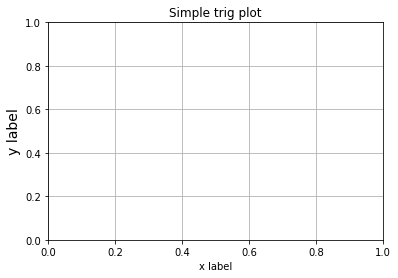

In [73]:
fig, ax = plt.subplots()   # Create a figure and an axes.
ax.set_title(r'Simple trig plot') # set axes title
ax.set_xlabel(r'x label') # add x label 
ax.set_ylabel(r'y label', fontdict={'fontsize':14})        # add y label
ax.grid()    # add a grid


Let us start by plotting $sin(\theta)$ and $\cos(\theta)$ on the interval 
$[-\pi, \, \pi]$ .

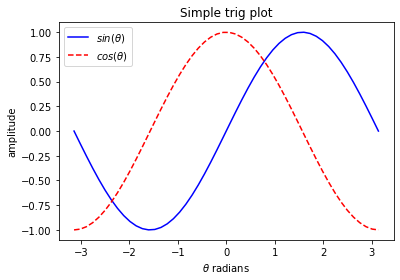

In [74]:
t = np.linspace(-np.pi, np.pi)

fig, ax = plt.subplots()   # Create a figure and an axes.
ax.set_title(r'Simple trig plot') # set axes title
ax.set_xlabel(r'$\theta$ radians') # add x label (Matplotlib is Latex aware)
ax.set_ylabel(r'amplitude')        # add y label

# Line plots
# We assign the line plots to variables so we can operate on them
sin_line, = ax.plot(t, np.sin(t), 'b-', label=r'$sin(\theta)$', linewidth=1.5)
cos_line, = ax.plot(t, np.cos(t), 'r--', label=r'$cos(\theta)$', linewidth=1.5)

# Antialise both line plots
sin_line.set_antialiased(True)
cos_line.set_antialiased(True)

# create legend
ax.legend(handles=[sin_line, cos_line], loc='upper left')

Let us 
1. Set the limits of the x-axis to $-\pi$ and $\pi$
2. Set the tick marks to correspond to the points $-\pi,-\frac{pi}{4}, 0, \frac{pi}{4}, \pi$
3. Set the tick labels to show as their analytic values
4. Set the y tick marks to occur at $-1, -\frac{1}{\sqrt 2}, 0, \frac{1}{\sqrt 2}, 1$

[Text(0, -1.0, '$-1$'),
 Text(0, -0.7071067811865476, '$-\\frac{1}{\\sqrt{2}}$'),
 Text(0, 0.0, '$0$'),
 Text(0, 0.7071067811865476, '$\\frac{1}{\\sqrt{2}}$'),
 Text(0, 1.0, '$1$')]

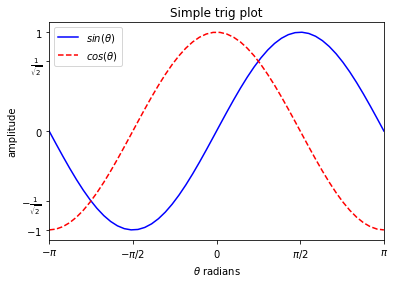

In [75]:
t = np.linspace(-np.pi, np.pi)

fig, ax = plt.subplots()   # Create a figure and an axes.
ax.set_title(r'Simple trig plot') # set axes title
ax.set_xlabel(r'$\theta$ radians') # add x label (Matplotlib is Latex aware)
ax.set_ylabel(r'amplitude')        # add y label

# Line plots
# We assign the line plots to variables so we can operate on them
sin_line, = ax.plot(t, np.sin(t), 'b-', label=r'$sin(\theta)$', linewidth=1.5)
cos_line, = ax.plot(t, np.cos(t), 'r--', label=r'$cos(\theta)$', linewidth=1.5)

# Antialise both line plots
sin_line.set_antialiased(True)
cos_line.set_antialiased(True)

# create legend
ax.legend(handles=[sin_line, cos_line], loc='upper left')

#--------------------------------------------------------------------#
# Set limits for x axis
ax.set_xlim(-np.pi, np.pi)

# Set ticks and tick labels for x
ax.set_xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],)
ax.set_xticklabels( [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$\pi/2$', r'$\pi$'])

# Set ticks and tick labels for y
ax.set_yticks([-1, -np.sqrt(1/2), 0, np.sqrt(1/2), 1],)
ax.set_yticklabels( [r'$-1$', r'$-\frac{1}{\sqrt{2}}$', r'$0$', r'$\frac{1}{\sqrt{2}}$', r'$1$'])

Now, let us annotate the plot at the points where $\sin \theta = \cos \theta$

Text(130, 18, '')

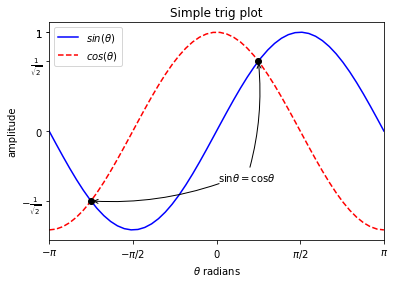

In [76]:
t = np.linspace(-np.pi, np.pi)

fig, ax = plt.subplots()   # Create a figure and an axes.
ax.set_title(r'Simple trig plot') # set axes title
ax.set_xlabel(r'$\theta$ radians') # add x label (Matplotlib is Latex aware)
ax.set_ylabel(r'amplitude')        # add y label

# Line plots
# We assign the line plots to variables so we can operate on them
sin_line, = ax.plot(t, np.sin(t), 'b-', label=r'$sin(\theta)$', linewidth=1.5)
cos_line, = ax.plot(t, np.cos(t), 'r--', label=r'$cos(\theta)$', linewidth=1.5)

# Antialise both line plots
sin_line.set_antialiased(True)
cos_line.set_antialiased(True)

# create legend
ax.legend(handles=[sin_line, cos_line], loc='upper left')

# Set limits for x axis
ax.set_xlim(-np.pi, np.pi)

# Set ticks and tick labels for x
ax.set_xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],)
ax.set_xticklabels( [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$\pi/2$', r'$\pi$'])

# Set ticks and tick labels for y
ax.set_yticks([1, -np.sqrt(1/2), 0, np.sqrt(1/2), 1],)
ax.set_yticklabels( [r'$-1$', r'$-\frac{1}{\sqrt{2}}$', r'$0$', r'$\frac{1}{\sqrt{2}}$', r'$1$'])

#--------------------------------------------------------------------#

# Points where sin t = cos t
p1, p2 = np.pi/4, -3*np.pi/4

# Plot points.
#We don't assign the plots to variables because we do not intend to use them further
ax.plot([p1,], [np.sin(p1),], 'ko', color='black',)
ax.plot([p2,], [np.sin(p2),], 'ko', color='black',)

# Add annotations
ax.annotate(r'$\sin \theta = \cos \theta$',       # annotation text
            xy=(p1, np.sin(p1)), xycoords='data', # point we are annotating
            textcoords='offset points',           # position text with respect to point
            xytext=(-40, -120),                   # coordinates for the text
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.1")) # arrow style

ax.annotate(r'',
            xy=(p2, np.sin(p2)), xycoords='data',
            xytext=(130, 18),
            textcoords='offset points',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-.1"))

Let us move the spines to be centered about the origin

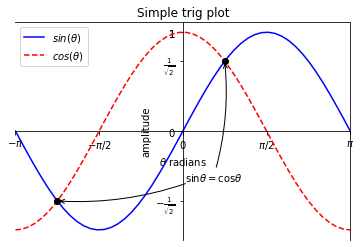

In [77]:
t = np.linspace(-np.pi, np.pi)

fig, ax = plt.subplots()   # Create a figure and an axes.
ax.set_title(r'Simple trig plot') # set axes title
ax.set_xlabel(r'$\theta$ radians') # add x label (Matplotlib is Latex aware)
ax.set_ylabel(r'amplitude')        # add y label

# Line plots
# We assign the line plots to variables so we can operate on them
sin_line, = ax.plot(t, np.sin(t), 'b-', label=r'$sin(\theta)$', linewidth=1.5)
cos_line, = ax.plot(t, np.cos(t), 'r--', label=r'$cos(\theta)$', linewidth=1.5)

# Antialise both line plots
sin_line.set_antialiased(True)
cos_line.set_antialiased(True)

# create legend
ax.legend(handles=[sin_line, cos_line], loc='upper left')

# Set limits for x axis
ax.set_xlim(-np.pi, np.pi)

# Set ticks and tick labels for x
ax.set_xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],)
ax.set_xticklabels( [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$\pi/2$', r'$\pi$'])

# Set ticks and tick labels for y
ax.set_yticks([1, -np.sqrt(1/2), 0, np.sqrt(1/2), 1],)
ax.set_yticklabels( [r'$-1$', r'$-\frac{1}{\sqrt{2}}$', r'$0$', r'$\frac{1}{\sqrt{2}}$', r'$1$'])

# Points where sin t = cos t
p1, p2 = np.pi/4, -3*np.pi/4

# Plot points.
#We don't assign the plots to variables because we do not intend to use them further
ax.plot([p1,], [np.sin(p1),], 'ko', color='black',)
ax.plot([p2,], [np.sin(p2),], 'ko', color='black',)

# Add annotations
ax.annotate(r'$\sin \theta = \cos \theta$',       # annotation text
            xy=(p1, np.sin(p1)), xycoords='data', # point we are annotating
            textcoords='offset points',           # position text with respect to point
            xytext=(-40, -120),                   # coordinates for the text
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.1")) # arrow style

ax.annotate(r'',
            xy=(p2, np.sin(p2)), xycoords='data',
            xytext=(130, 18),
            textcoords='offset points',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-.1"))


#--------------------------------------------------------------------#

ax.xaxis.set_ticks_position('bottom')        # set tick marks to appear on bottom axis
ax.spines['bottom'].set_position(('data',0)) # set bottom spine to go through 0
ax.yaxis.set_ticks_position('left')          # set tick marks to appear on left axis
ax.spines['left'].set_position(('data',0))   # set left spine to go through 0

Now, let us clean up the figure by
1. making the right and top spines invisible,
2. removing unnecessary ticks on the y-axis,
3. moving the label of the x axis to the right of the figure
4. removing the label of the y-axis

[Text(0, -1, '$-1$'), Text(0, 1, '$1$')]

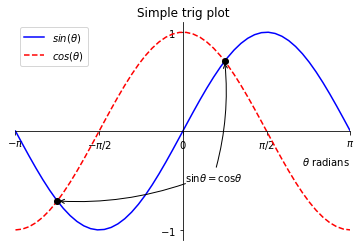

In [78]:
t = np.linspace(-np.pi, np.pi)

fig, ax = plt.subplots()   # Create a figure and an axes.
ax.set_title(r'Simple trig plot') # set axes title
ax.set_xlabel(r'$\theta$ radians', loc='right') # add x label (Matplotlib is Latex aware)

# Line plots
# We assign the line plots to variables so we can operate on them
sin_line, = ax.plot(t, np.sin(t), 'b-', label=r'$sin(\theta)$', linewidth=1.5)
cos_line, = ax.plot(t, np.cos(t), 'r--', label=r'$cos(\theta)$', linewidth=1.5)

# Antialise both line plots
sin_line.set_antialiased(True)
cos_line.set_antialiased(True)

# create legend
ax.legend(handles=[sin_line, cos_line], loc='upper left')

# Set limits for x axis
ax.set_xlim(-np.pi, np.pi)

# Set ticks and tick labels for x
ax.set_xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],)
ax.set_xticklabels( [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$\pi/2$', r'$\pi$'])


# Points where sin t = cos t
p1, p2 = np.pi/4, -3*np.pi/4

# Plot points.
#We don't assign the plots to variables because we do not intend to use them further
ax.plot([p1,], [np.sin(p1),], 'ko', color='black',)
ax.plot([p2,], [np.sin(p2),], 'ko', color='black',)

# Add annotations
ax.annotate(r'$\sin \theta = \cos \theta$',       # annotation text
            xy=(p1, np.sin(p1)), xycoords='data', # point we are annotating
            textcoords='offset points',           # position text with respect to point
            xytext=(-40, -120),                   # coordinates for the text
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.1")) # arrow style

ax.annotate(r'',
            xy=(p2, np.sin(p2)), xycoords='data',
            xytext=(130, 18),
            textcoords='offset points',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-.1"))




ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

#--------------------------------------------------------------------#
# make top an right spines invisible
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')


# Set ticks and tick labels for y
ax.set_yticks([-1,  1],)
ax.set_yticklabels( [r'$-1$', r'$1$'])

## Subplots

Subplots are supported as well.
Simply direct your plots to the required axes.

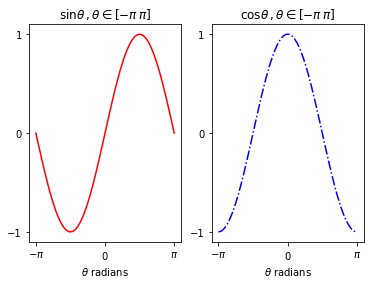

In [79]:
t = np.linspace(-np.pi, np.pi)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2) 
ax1.set_title(r'$\sin \theta\, , \theta \in [-\pi \, \pi] $')
ax1.set_xlabel(r'$\theta$ radians')
ax1.plot(t, np.sin(t), 'r-')


ax2.set_title(r'$\cos \theta\, , \theta \in [-\pi \, \pi] $') # set axes title
ax2.set_xlabel(r'$\theta$ radians')
ax2.plot(t, np.cos(t), 'b-.')

for ax in ax1, ax2:
    ax.set_xticks([-np.pi, 0, np.pi])
    ax.set_xticklabels([r'$-\pi$', r'$0$', r'$\pi$'])
    ax.set_yticks([-1, 0, 1])


# 3D Plots

In [80]:
%matplotlib

Using matplotlib backend: TkAgg


Planar plots are made on a plane parametised by a two-dimensional grid.
In order to make three and higher dimensional plots, we need to make an appropriate grid.
A **mesh grid** is a grid of coordinates such that each coordinate is defined by an array.

Let us see some mesh grids by example.

In [81]:
x = np.array([1,2,3])
y = np.array([13, 17])

xx, yy = np.meshgrid(x, y)  # yes we can upack numpy arrays like other Python sequences
xx, yy

(array([[1, 2, 3],
        [1, 2, 3]]),
 array([[13, 13, 13],
        [17, 17, 17]]))

We can see from above that the resulting array `xx` is gotten by repeating the vector `x`
along its rows, exactly the length of the vector `y` times.

Likewise, the vector `yy` is gotten by repeating the vector y along its columns exactly the
length of the vector `x` times.

In fact, the meshgrid gives us a region of a hyperplane where we can compute points.


With the meshgrid, we compute and visualise functions.
Consider the examples below

In [82]:
zz = xx + yy
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx, yy, zz)     # surface plot


In [83]:
# The Sombero Hat GnuOctave's former logo

tx = ty = np.linspace(-8, 8, 50)
xx, yy = np.meshgrid(tx, ty)
r = np.sqrt(xx**2 + yy**2)
tz = np.sin(r) / r      # See how the form is similar to the sinc function

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx, yy, tz)

In [84]:
# Dome
xs = np.linspace(-2,2)
xx, yy = np.meshgrid(xs, xs)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(xx, yy, 4 - (xx**2 + yy**2))

# Putting it together

Consider the following task.
Given a Jpeg image file `img` and a scaling treshold `treshold`, decompose `img` into
three matrices: bin_red, bin_green and bin_blue such that bin_red is a boolean matrix of
the red components of `img` whith a true value where each entry is greater than or equal
to `treshold` and zero otherwise.
The bin_blue, and bin_green matrices are similarly defined.


The program should display the binary images as well as the result of overlaying them.

In [108]:
%%file improcess.py
'''improcess.py
A simple image processing program
'''
def rgb_decompose(image):
    '''Return a tuple of 3 numpy arrays for the red, green and blue components
    of image.
    
    Parameters
    -----------
    image: array like, 3d array
    
    Returns
    --------
    tuple of array like
    '''
    red_arr = image[:,:,0]
    blue_arr = image[:,:,1]
    green_arr = image[:,:,2]
    return red_arr, blue_arr, green_arr

Overwriting improcess.py


In [109]:
%%file improcess.py -a


def bin_arr(arr, treshold):
    '''Return an array like arr such that its values are `1` where the corresponding
    value of arr is greater than or equal to treshold, and 0 otherwise
    
    Parameters
    ----------
    arr: array like of numbers
    
    Returns
    -------
    array like
    '''
    xs = np.zeros_like(arr)
    xs[arr >= treshold] = 1
    return xs

Appending to improcess.py


In [110]:
%%file improcess.py -a


def present_composite(red_bin, blue_bin, green_bin):
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
    ax1.imshow(np.logical_or(red_bin, blue_bin, green_bin))
    ax1.set_title('Composite image')
    ax2.imshow(red_bin)
    ax2.set_title('Red Bin Component')
    ax3.imshow(blue_bin)
    ax3.set_title('Blue Bin Component')
    ax4.imshow(green_bin)
    ax4.set_title('Green Bin Component')
    
    for ax in ax1, ax2, ax3, ax4:
        ax.set_xticks([])
        ax.set_yticks([])
        for side in 'top left bottom right'.split():
            ax.spines[side].set_color('none')
    plt.show()

Appending to improcess.py


In [111]:
%%file improcess.py -a


def present_faux_colour(img, red_bin, blue_bin, green_bin, scale_factor):
    new_img = np.dstack((rbin, gbin, bbin)) * scale_factor # combine channels to rgb jpeg
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
    ax1.imshow(img)
    ax1.set_title('Original Image')
    ax2.imshow(new_img)
    ax2.set_title('Faux Colour Image')

    for ax in ax1, ax2:
        ax.set_xticks([])
        ax.set_yticks([])
        for side in 'top left bottom right'.split():
            ax.spines[side].set_color('none')
    plt.show()

Appending to improcess.py


In [112]:
%%file improcess.py -a

if __name__ == '__main__':
    import argparse
    import matplotlib.pyplot as plt
    import numpy as np
    
    DESCRIPTION = '''A simple image processing program.
    Decompose an input image file into binary components with respect to a given
    treshold.
    
    Author: Xero
    Licence: MIT
    '''
    parser = argparse.ArgumentParser(prog=__file__[:-3], description=DESCRIPTION)
    parser.add_argument('-f', action='store', type=str, default='charlie.jpg',
                        help='Path to file to be processed')
    parser.add_argument('-t', action='store', type=int, default=120,
                       help='Scaling treshold, this sets the contrast of the resulting images')
    
    args = parser.parse_args()
    
    img = plt.imread(args.f, format='jpeg')
    treshold = args.t
    rx, gx, bx, = rgb_decompose(img)
    rbin, gbin, bbin = map(lambda xs: bin_arr(xs, treshold), (rx, gx, bx,))
    present_composite(rbin, gbin, bbin)
    present_faux_colour(img, rbin, gbin, bbin, treshold)
    

Appending to improcess.py


To run the program, 
1. navigate to the directory containing the program in the shell.
2. Activate the virtual environment.
3. In the shell, do `$ python improcess.py`

Compare the composite image with the original image `charlie.jpg`

Because of the behaviour of `matplotlib.pyplot.show`, the each figure will block until it is closed before the next one can be plotted. https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.show

# Honorable Mentions
- Dask : a scientific computing library which lets your work scale 
  from a single laptop to a supercomputer, to a distributed cluster, all with a simple api similar to numpy and pandas.
  
- Sagemath: The premier scientific computing environment.
  It brings together several high quality projects, written in
  different languages under a single powerful Python environment.
  
- Cython: compile your Python code machine via C. Effortlessly
  intermingle Python and C.  Developed by the SageMath team.
  
- Pandas: Datascience toolkit

and many more

# References

- Virtanen, P., Gommers, R., Oliphant, T.E. et al, "SciPy 1.0: fundamental algorithms for scientific computing in Python", Nat Methods 17, 261–272 (2020), https://doi.org/10.1038/s41592-019-0686-2

- Numpy datatypes https://numpy.org/doc/stable/reference/arrays.dtypes.html

- Numpy Broadcasting https://numpy.org/devdocs/user/basics.broadcasting.html#basics-broadcasting

- Matplotlib Axis Source https://matplotlib.org/3.3.2/_modules/matplotlib/axes/_axes.html#Axes.set_xlabel


- Charlie, Charlie,https://unsplash.com/@charliegotletters?utm_source=unsplash&amp;utm_medium=referral&amp;utm_content=creditCopyText

- Sagemath  https://www.sagemath.org/
- Dask  https://dask.org/
- Cython  https://cython.org/